<a href="https://colab.research.google.com/github/shravanikalapure/Data-Mining-Warehousing/blob/main/DMW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Name: Shravani Kalapure
# PRN: 123B1B064

import pandas as pd
import numpy as np
# Importing Dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
print('Before dropping duplicates: ',df.shape)

Before dropping duplicates:  (891, 12)


In [ ]:
# Removal of Duplicates
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [ ]:
df=df.drop_duplicates()
print('After dropping duplicates: ',df.shape)

After dropping duplicates:  (891, 12)


In [ ]:
# Handling Missing Values
print("Identifying Null Values: ")
df.isnull().sum()

Identifying Null Values: 


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
print("Dropped ['Cabin'] because too many null values ")
df=df.drop('Cabin',axis=1)

Dropped ['Cabin'] because too many null values 


In [ ]:
# Filling null values in Age with MEAN
df['Age']=df['Age'].fillna(df['Age'].mean())

In [ ]:
# Fillinf null values in Emabrked with MODE
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
print("After handling null values: ")
df.isnull().sum()

After handling null values: 


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Handling 'Sex' column:
df['Sex'] = df['Sex'].str.lower()

# Replace common variations
df['Sex'] = df['Sex'].replace({
    'm': 'Male',
    'male': 'Male',
    'M': 'Male',
    'f': 'Female',
    'female': 'Female',
    'F': 'Female'
})

print("After standardized Sex column: ")
df.head(10)

After standardized Sex column: 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",Male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",Male,29.699118,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",Male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",Male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",Female,14.000000,1,0,237736,30.0708,C


In [ ]:
# Normalizing and Scaling the Data

from sklearn.preprocessing import MinMaxScaler, StandardScaler
# columns to scale (numeric)
cols_to_scale = ['Age', 'Fare','PassengerId','Survived','Pclass']
scaler = MinMaxScaler()
df1=df.copy()
df1[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df1.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.000000,0.0,1.0,"Braund, Mr. Owen Harris",Male,0.271174,1,0,A/5 21171,0.014151,S
1,0.001124,1.0,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,0.472229,1,0,PC 17599,0.139136,C
2,0.002247,1.0,1.0,"Heikkinen, Miss. Laina",Female,0.321438,0,0,STON/O2. 3101282,0.015469,S
3,0.003371,1.0,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,0.434531,1,0,113803,0.103644,S
4,0.004494,0.0,1.0,"Allen, Mr. William Henry",Male,0.434531,0,0,373450,0.015713,S


In [ ]:
# Central Tendencies:
df_numeric=df.select_dtypes(include=[np.number])
df_numeric.mean()


,0
PassengerId,446.000000
Survived,0.383838
Pclass,2.308642
Age,29.699118
SibSp,0.523008
Parch,0.381594
Fare,32.204208


In [ ]:
df_numeric.mode()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3.0,29.699118,0.0,0.0,8.05
1,2,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
886,887,NaN,NaN,NaN,NaN,NaN,NaN
887,888,NaN,NaN,NaN,NaN,NaN,NaN
888,889,NaN,NaN,NaN,NaN,NaN,NaN
889,890,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_numeric.median()

,0
PassengerId,446.000000
Survived,0.000000
Pclass,3.000000
Age,29.699118
SibSp,0.000000
Parch,0.000000
Fare,14.454200


In [ ]:
df_numeric.std()

,0
PassengerId,257.353842
Survived,0.486592
Pclass,0.836071
Age,13.002015
SibSp,1.102743
Parch,0.806057
Fare,49.693429


In [ ]:
df_numeric.var()

,0
PassengerId,66231.000000
Survived,0.236772
Pclass,0.699015
Age,169.052400
SibSp,1.216043
Parch,0.649728
Fare,2469.436846


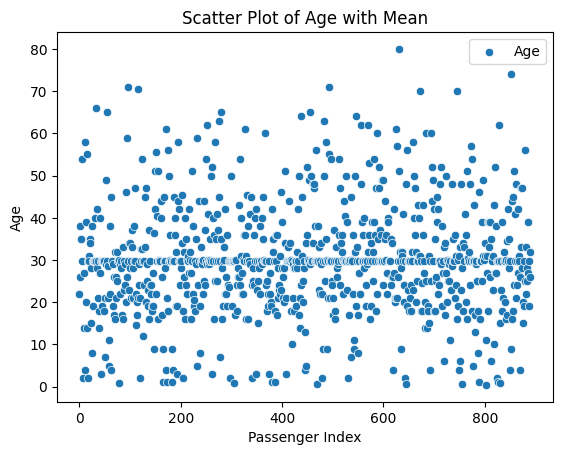

In [ ]:
# Graphical representation
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=df.index, y=df['Age'],label='Age')

# Add labels
plt.xlabel('Passenger Index')
plt.ylabel('Age')
plt.title('Scatter Plot of Age with Mean')
plt.show()

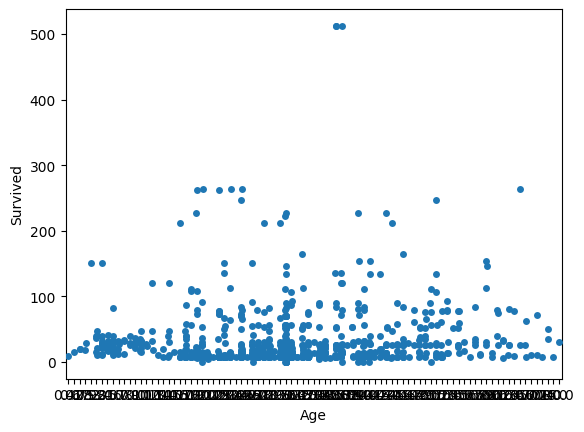

In [ ]:
sns.stripplot(x='Age',y='Fare',data=df)
plt.xlabel("Age")
plt.ylabel("Survived")
plt.show()

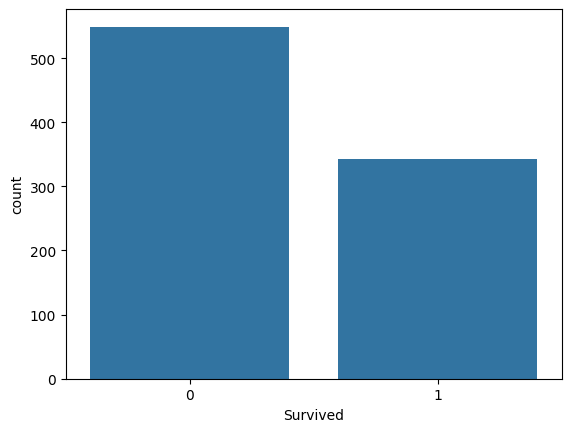

In [ ]:
# Visualize the count of passengers survived
sns.countplot(x ='Survived', data = df)
plt.show()

In [ ]:
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Keep only rows within bounds
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Example usage for multiple columns
df_clean = remove_outliers_iqr(df, ['Age'])

print(df_clean)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    Male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  Female  38.000000   
2                               Heikkinen, Miss. Laina  Female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  Female  35.000000   
4                             Allen, Mr. William Henry    Male  35.000000   
..                                                 ...     ...        ...   
886 

In [ ]:
print("Original shape:", df.shape)
print("After outlier removal:", df_clean.shape)

Original shape: (891, 11)
After outlier removal: (825, 11)


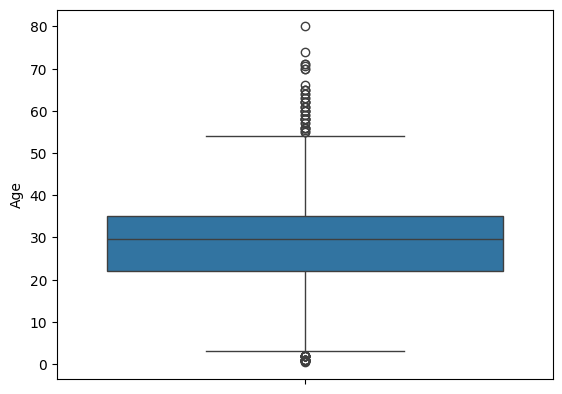

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df['Age'])
plt.show()

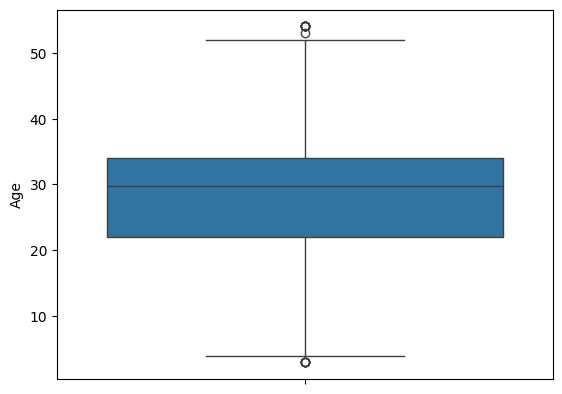

In [ ]:
sns.boxplot(df_clean['Age'])
plt.show()